In [49]:
import pandas as pd
df = pd.read_csv("EV_Stations_data.csv")
df.head()

,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [50]:
#summary statistics 
print(df.describe().to_string())

                                Station Name Street Address      City Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info      New Georeferenced Column
count                                    385            385       385              385                385                385              385           385                           385
unique                                   361            365       119               53                  5                 14               10             3                           384
top     Western Connecticut State University   495 Union St  Stamford   24 hours daily               NONE                  2             NONE          NONE  POINT (-72.489406 41.983904)
freq                                       4              4        21              222                376                179              331           383                             2


In [8]:
#Checking for null values
print(df.isnull().sum())

Station Name                0
Street Address              0
City                        0
Access Days Time            0
EV Level1 EVSE Num          0
EV Level2 EVSE Num          0
EV DC Fast Count            0
EV Other Info               0
New Georeferenced Column    0
dtype: int64


In [51]:
#Checking for duplicates 
data=pd.DataFrame(df)
duplicates = data.duplicated(keep=False)

# print the duplicate rows
print(data[duplicates])

Empty DataFrame
Columns: [Station Name, Street Address, City, Access Days Time, EV Level1 EVSE Num, EV Level2 EVSE Num, EV DC Fast Count, EV Other Info, New Georeferenced Column]
Index: []


In [52]:
# Rename the columns
df.columns = ['Station_Name', 'Street_Address', 'City', 'Access_Days_Time', 'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count', 'EV_Other_Info', 'New_Georeferenced_Column']
df.head()


,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [53]:
df= df.replace('NONE','0')

# changing datatype from object to integers

try:
  for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle conversion errors
except:
  pass 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station_Name              385 non-null    object
 1   Street_Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access_Days_Time          385 non-null    object
 4   EV_Level1_EVSE_Num        385 non-null    int64 
 5   EV_Level2_EVSE_Num        385 non-null    int64 
 6   EV_DC_Fast_Count          385 non-null    int64 
 7   EV_Other_Info             385 non-null    object
 8   New_Georeferenced_Column  385 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.2+ KB
None


In [12]:
# Filter the rows
filtered_df = df[df['Access_Days_Time'] == '24 hours daily; for Tesla use only']

# Display the filtered DataFrame
filtered_df.head(100)

,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,0,POINT (-72.773473 41.527367)
6,Corbins Corner Shopping Center - Tesla Superch...,1445 New Britain Ave.,West Hartford,24 hours daily; for Tesla use only,0,0,8,0,POINT (-72.759717 41.722672)
18,The Plaza at Buckland Hills - Tesla Supercharger,1470 Pleasant Valley Road,Manchester,24 hours daily; for Tesla use only,0,0,16,0,POINT (-72.562282 41.80452)
56,Dunkin' Donuts - Tesla Supercharger,160 Kukas Lane,Waterbury,24 hours daily; for Tesla use only,0,0,8,0,POINT (-73.005613 41.53713)
84,Connecticut Welcome Center - Tesla Supercharger,1 West Ave.,Darien,24 hours daily; for Tesla use only,0,0,4,0,POINT (-73.504917 41.067306)
94,Connecticut Post Mall - Tesla Supercharger,1201 Boston Post Road,Milford,24 hours daily; for Tesla use only,0,0,14,0,POINT (-73.036133 41.238119)
96,New London Mall - Tesla Supercharger,369 N Frontage Rd,New London,24 hours daily; for Tesla use only,0,0,8,0,POINT (-72.119376 41.370726)
160,Greenwich Southbound Travel Plaza - Tesla Supe...,2000 Merritt Parkway,Greenwich,24 hours daily; for Tesla use only,0,0,4,0,POINT (-73.673445 41.040555)
195,North Canaan Shopping Center - Tesla Supercharger,11 E Main St,North Canaan,24 hours daily; for Tesla use only,0,0,8,0,POINT (-73.322808 42.024351)
200,Milford Travel Plaza - Tesla Supercharger,I-95 Milford,Milford,24 hours daily; for Tesla use only,0,0,2,0,POINT (-73.009059 41.245823)


In [13]:
# Count the number of rows
count = len(filtered_df)

# Display the count
print(f'The number of rows with "24 hours daily; for Tesla use only" is: {count}')

The number of rows with "24 hours daily; for Tesla use only" is: 19


In [14]:
# Filter the rows that contain the substring 'Tesla'
filtered_df = df[df['Access_Days_Time'].str.contains('Tesla', case=False, na=False)]

# Display the filtered DataFrame
filtered_df.head(100)

count = len(filtered_df)
# Display the count
print(f'The number of rows with "24 hours daily; for Tesla use only" is: {count}')


The number of rows with "24 hours daily; for Tesla use only" is: 22


In [15]:
# # Filter the rows that have 'NONE' in both 'EV_Level1_EVSE_Num' and 'EV_Level2_EVSE_Num'
# filtered_df = df[(df['EV_Level1_EVSE_Num'] == 'NONE') & (df['EV_Level2_EVSE_Num'] == 'NONE')]

# # Count the number of rows
# count = len(filtered_df)

# # Display the count
# print(f'The number of rows with "NONE" in both EV_Level1_EVSE_Num and EV_Level2_EVSE_Num is: {count}')

# # Display the filtered DataFrame
# # filtered_df.head(100)

In [16]:
# Group the rows by 'Access_Days_Time' and display the groups
grouped_df = df.groupby('Access_Days_Time')

# Display each group
for name, group in grouped_df:
    print(f'\nAccess Days Time: {name}')
    group.head(10)


Access Days Time: 10am-8pm M-Th, 10am-6pm F, 10am-5pm Sat, 1pm-5pm Sun (Sunday hours in winter only)

Access Days Time: 11am-10pm daily

Access Days Time: 24 hours daily

Access Days Time: 24 hours daily; 2 hour limit

Access Days Time: 24 hours daily; Tesla users only

Access Days Time: 24 hours daily; for Tesla use only

Access Days Time: 24 hours daily; for customer use only

Access Days Time: 24 hours daily; for customer use only; see front desk for access

Access Days Time: 24 hours daily; for customer use only; see valet for access

Access Days Time: 24 hours daily; for member use only; see valet for access

Access Days Time: 24 hours daily; guest use only; see front desk for access

Access Days Time: 24 hours daily; overnight valet fee

Access Days Time: 24 hours daily; pay lot

Access Days Time: 24 hours daily; pay lot; see attendant for access

Access Days Time: 24 hours daily; permit lot

Access Days Time: 24 hours daily; priority for Connecticut Green Bank employees

Access

In [17]:
# Group the rows by 'Access_Days_Time' and count the number of elements in each group
group_counts = df.groupby('Access_Days_Time').size().reset_index(name='Count')

# Display the counts
# print(group_counts.to_string())

In [18]:
# Assuming you have your data in a DataFrame already

grouped = pd.DataFrame(group_counts)

# Standardize the text to lowercase to handle inconsistencies
grouped['Access_Days_Time'] = grouped['Access_Days_Time'].str.lower()

# Extract common patterns and create new categories
# For example, we can identify different access categories
def categorize_access_days_time(text):
    if 'tesla' in text:
        return 'Tesla'
    elif 'daily' in text or '24 hours' in text:
        return 'Daily'
    elif 'business hours' in text:
        return 'Business Hours'
    elif 'pay lot' in text:
        return 'Pay Lot'
    else:
        return 'Other'

grouped['Category'] = grouped['Access_Days_Time'].apply(categorize_access_days_time)

# Group by the new category and count the occurrences
category_counts = grouped.groupby('Category').sum().reset_index()

# Display the counts
print(category_counts.to_string())

         Category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Access_Da

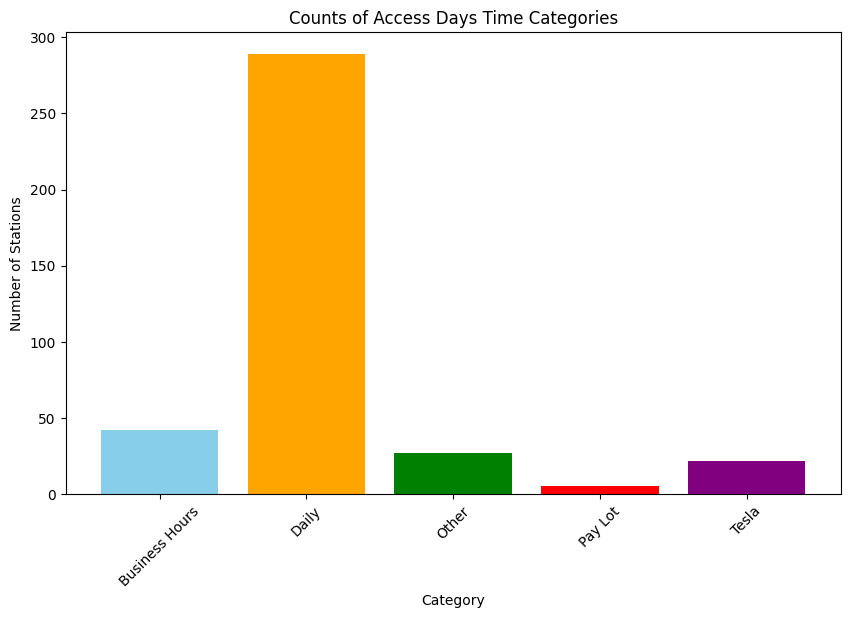

In [19]:
import matplotlib.pyplot as plt

# Define a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Category'], category_counts['Count'], color=colors[:len(category_counts)])
plt.xlabel('Category')
plt.ylabel('Number of Stations')
plt.title('Counts of Access Days Time Categories')
plt.xticks(rotation=45)
plt.show()

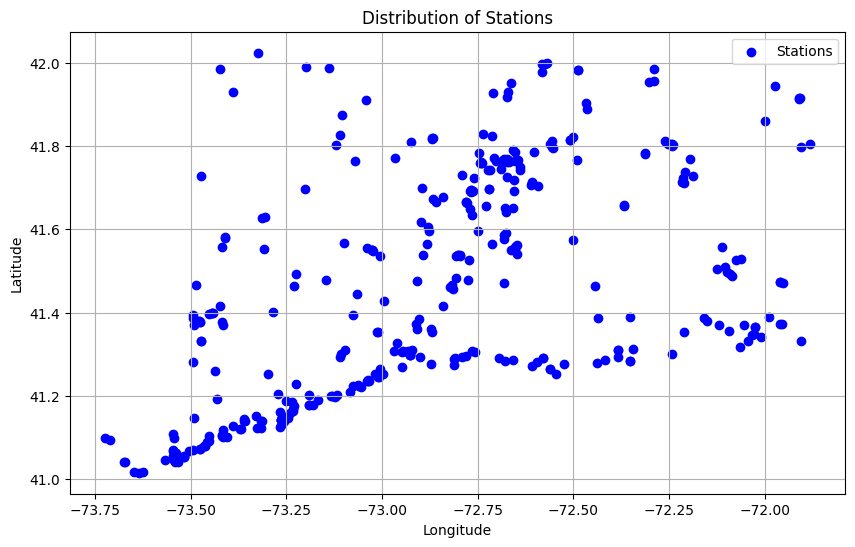

In [20]:



import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)



# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', marker='o', label='Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Stations')
plt.legend()
plt.grid(True)
plt.show()

In [21]:

import numpy as np

# Calculate the bounding box
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

# Function to calculate the distance between two lat/lon points in miles
def haversine(lon1, lat1, lon2, lat2):
    R = 3958.8  # Earth radius in miles
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the width and height of the bounding box in miles
width = haversine(min_lon, min_lat, max_lon, min_lat)
height = haversine(min_lon, min_lat, min_lon, max_lat)

# Calculate the total area in square miles
total_area_sq_miles = width * height

# Count the number of stations
num_stations = len(df)

# Calculate the density of stations per square mile
density_stations_per_sq_mile = num_stations / total_area_sq_miles

# Print the results
print(f'Total area: {total_area_sq_miles:.2f} square miles')
print(f'Number of stations: {num_stations}')
print(f'Density of stations: {density_stations_per_sq_mile:.2f} stations per square mile')

Total area: 6689.14 square miles
Number of stations: 385
Density of stations: 0.06 stations per square mile


In [22]:
df.head()

,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column,geometry,Latitude,Longitude
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,0,2,0,0,POINT (-73.4764687 41.072882),POINT (-73.4764687 41.072882),41.072882,-73.476469
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,0,POINT (-72.773473 41.527367),POINT (-72.773473 41.527367),41.527367,-72.773473
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,0,1,0,0,POINT (-73.065583 41.44548100000001),POINT (-73.065583 41.44548100000001),41.445481,-73.065583
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,0,2,0,0,POINT (-72.3825 41.3102778),POINT (-72.3825 41.3102778),41.310278,-72.382500
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,0,2,0,0,POINT (-73.264511 41.143125),POINT (-73.264511 41.143125),41.143125,-73.264511


In [23]:

#Availability and Count of Charging Levels
# count occurrences of each EV level
level1_count = df[df['EV_Level1_EVSE_Num'] != 0].shape[0]
level2_count = df[df['EV_Level2_EVSE_Num'] != 0].shape[0]
dc_fast_count = df[df['EV_DC_Fast_Count'] != 0].shape[0]

# Print the counts
print(f'EV Level 1 Count: {level1_count}')
print(f'EV Level 2 Count: {level2_count}')
print(f'EV DC Fast Count: {dc_fast_count}')

EV Level 1 Count: 9
EV Level 2 Count: 341
EV DC Fast Count: 54


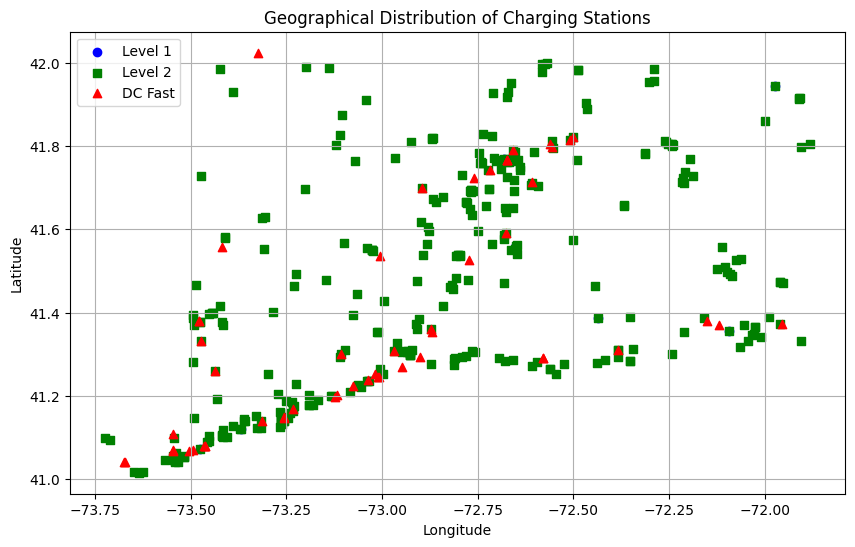

In [24]:
# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)

# Create separate DataFrames for each type of charging level
df_level1 = df[df['EV_Level1_EVSE_Num'] != 0]
df_level2 = df[df['EV_Level2_EVSE_Num'] != 0]
df_dc_fast = df[df['EV_DC_Fast_Count'] != 0]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_level1['Longitude'], df_level1['Latitude'], c='blue', marker='o', label='Level 1')
plt.scatter(df_level2['Longitude'], df_level2['Latitude'], c='green', marker='s', label='Level 2')
plt.scatter(df_dc_fast['Longitude'], df_dc_fast['Latitude'], c='red', marker='^', label='DC Fast')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Charging Stations')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#Usage Patterns
# Count the number of stations with different access times and restrictions
access_time_counts = df['Access_Days_Time'].value_counts()

# Print the access times and their counts
print(access_time_counts)

Access_Days_Time
24 hours daily                                                                                                                                       222
Dealership business hours                                                                                                                             26
24 hours daily; for Tesla use only                                                                                                                    19
24 hours daily; for customer use only                                                                                                                 17
24 hours daily; pay lot                                                                                                                               11
MO: Not Specified; TU: Not Specified; WE: Not Specified; TH: Not Specified; FR: Not Specified; SA: Not Specified; SU: Not Specified                    9
24 hours daily; for customer use only; see front desk for access 

In [26]:
#Findind the number of stations with in different cities
city_counts = df['City'].value_counts()

# Print the city and their counts
print(city_counts.to_string())

City
Stamford              21
Hartford              20
Fairfield             20
New Haven             13
Danbury               12
Milford               11
Westport              10
Middletown             9
New Britain            9
West Hartford          8
Groton                 8
Darien                 8
Greenwich              8
Norwalk                8
Madison                7
Meriden                6
Branford               6
Old Saybrook           6
Manchester             6
Waterbury              6
Norwich                5
Storrs                 5
East Hartford          5
Wallingford            5
Bridgeport             5
Stratford              4
Glastonbury            4
Enfield                4
Mansfield              4
North Haven            3
Ridgefield             3
Stafford Springs       3
Newington              3
Plainville             3
Torrington             3
New Milford            3
Guilford               3
Mystic                 3
Shelton                3
Putnam              

count
1-3 stations     90
4-7 stations     15
7-11 stations     9
12+ stations      5
Name: count, dtype: int64


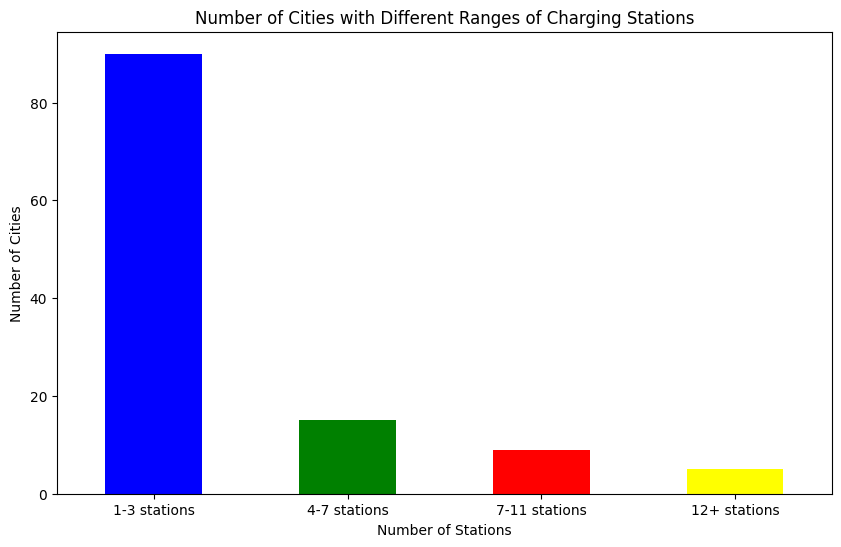

In [27]:
# Converting  the dictionary to a DataFrame
city_counts = pd.Series(city_counts)

# Define bins for the ranges
bins = [0, 3, 7, 11, city_counts.max()]
labels = ['1-3 stations', '4-7 stations', '7-11 stations','12+ stations']

# Cut the city counts into the specified bins
city_bins = pd.cut(city_counts, bins=bins, labels=labels, right=True)

# Count the number of cities in each bin
bin_counts = city_bins.value_counts().sort_index()

# Print the bin counts
print(bin_counts)

# Plot the data
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Number of Stations')
plt.ylabel('Number of Cities')
plt.title('Number of Cities with Different Ranges of Charging Stations')
plt.xticks(rotation=0)
plt.show()

                   City  Count
0              Stamford     21
1              Hartford     20
2             Fairfield     20
3             New Haven     13
4               Danbury     12
5               Milford     11
6              Westport     10
7            Middletown      9
8           New Britain      9
9         West Hartford      8
10               Groton      8
11               Darien      8
12            Greenwich      8
13              Norwalk      8
14              Madison      7
15              Meriden      6
16             Branford      6
17         Old Saybrook      6
18           Manchester      6
19            Waterbury      6
20              Norwich      5
21               Storrs      5
22        East Hartford      5
23          Wallingford      5
24           Bridgeport      5
25            Stratford      4
26          Glastonbury      4
27              Enfield      4
28            Mansfield      4
29          North Haven      3
30           Ridgefield      3
31     S

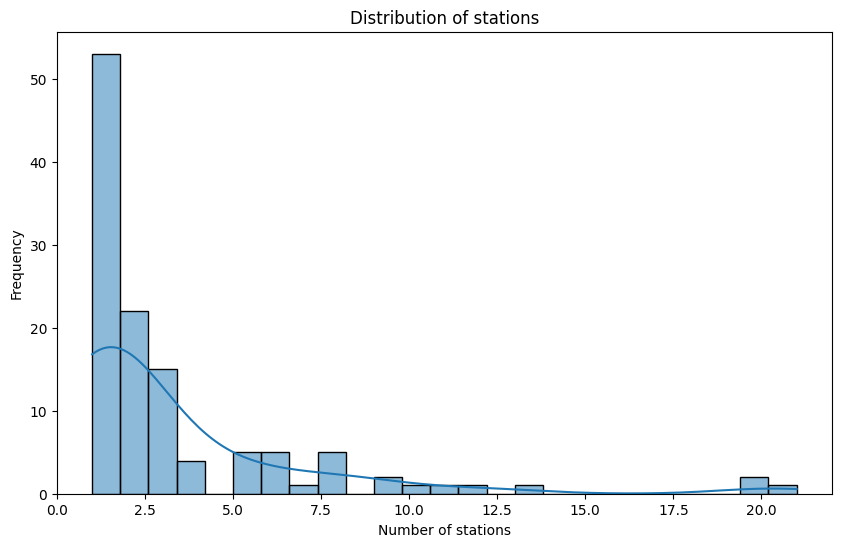

In [28]:
import seaborn as sns

# Convert the Series to a DataFrame for easier handling
data = city_counts.reset_index()
data.columns = ['City', 'Count']

print(data.to_string())

# Visualize the distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Count'].dropna(), kde=True)
plt.title('Distribution of stations')
plt.xlabel('Number of stations')
plt.ylabel('Frequency')
plt.show()

      Station_Category  Count
0         Level 2 only    322
1         DC Fast only     42
2  Level 2 and DC Fast     12
3        Level 1 and 2      7
4         Level 1 only      2


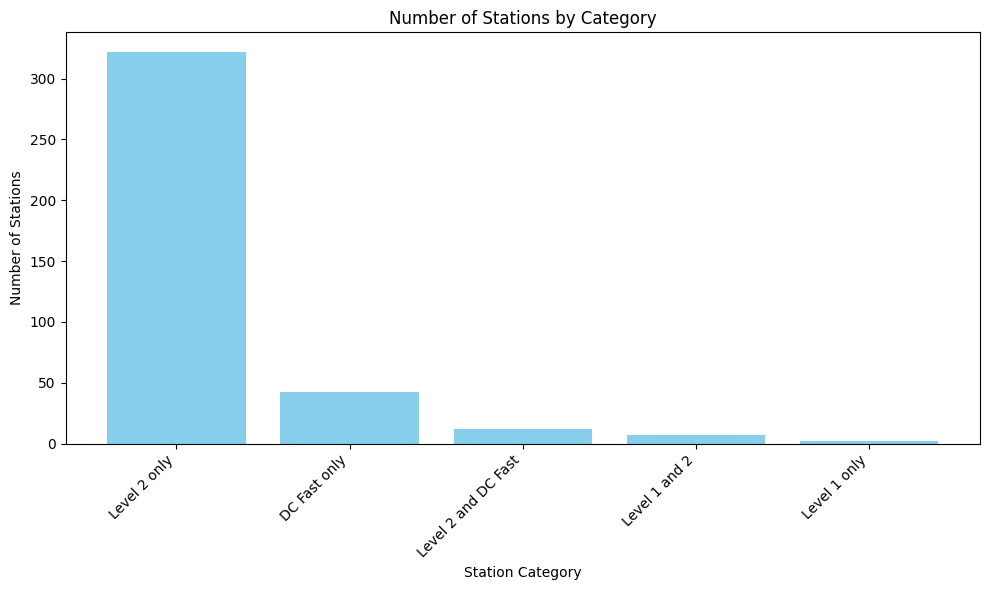

In [29]:
# Create a new column to categorize the stations
def categorize_station(row):
    level1 = row['EV_Level1_EVSE_Num'] > 0
    level2 = row['EV_Level2_EVSE_Num'] > 0
    dc_fast = row['EV_DC_Fast_Count'] > 0
    
    if level1 and not level2 and not dc_fast:
        return 'Level 1 only'
    elif not level1 and level2 and not dc_fast:
        return 'Level 2 only'
    elif not level1 and not level2 and dc_fast:
        return 'DC Fast only'
    elif level1 and level2 and not dc_fast:
        return 'Level 1 and 2'
    elif level1 and not level2 and dc_fast:
        return 'Level 1 and DC Fast'
    elif not level1 and level2 and dc_fast:
        return 'Level 2 and DC Fast'
    elif level1 and level2 and dc_fast:
        return 'Level 1, 2, and DC Fast'
    else:
        return 'Other'

df['Station_Category'] = df.apply(categorize_station, axis=1)

# Count the number of stations in each category
category_counts = df['Station_Category'].value_counts().reset_index()
category_counts.columns = ['Station_Category', 'Count']

print(category_counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Station_Category'], category_counts['Count'], color='skyblue')
plt.title('Number of Stations by Category')
plt.xlabel('Station Category')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The vast majority of the stations fall under the "Level 2 only" category, indicating that Level 2 chargers are the most common type of EV charger available.
A smaller number of stations provide "DC Fast only" chargers. This indicates that while DC Fast chargers are available, they are not as prevalent as Level 2 chargers.
There are even fewer stations that offer both "Level 2 and DC Fast" chargers. This suggests that combined charging options are less common
Stations that provide both "Level 1 and 2" chargers are minimal. This could be because Level 1 chargers are generally slower and less preferred by users compared to Level 2 chargers.
NB: There is no Station that provides the all three types of chargers in the State

# Actionable Insights
Increase DC Fast Chargers: With the rising number of EVs and the demand for faster charging options, increasing the number of DC Fast chargers could enhance user convenience and attract more EV users.




In [30]:
print(df.head())

                          Station_Name          Street_Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  \
0                      24 hours daily                   0                   2   
1  24 hours daily; for Tesla use only                   0                   0   
2                      24 hours daily                   0                   1   
3                      24 hours daily                   0                   2   
4                      24 hours daily                   0                   2   

   EV_DC_Fast_Count EV_Other_Inf

In [31]:
import pandas as pd
import numpy as np



# Calculate the total number of chargers for each station
df['Total_Chargers'] = df[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum(axis=1)

# Group by Station and sum the number of chargers
grouped_df = df.groupby('Station_Name')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count', 'Total_Chargers']].sum().reset_index()

df.head()


,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column,geometry,Latitude,Longitude,Station_Category,Total_Chargers
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,0,2,0,0,POINT (-73.4764687 41.072882),POINT (-73.4764687 41.072882),41.072882,-73.476469,Level 2 only,2
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,0,POINT (-72.773473 41.527367),POINT (-72.773473 41.527367),41.527367,-72.773473,DC Fast only,8
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,0,1,0,0,POINT (-73.065583 41.44548100000001),POINT (-73.065583 41.44548100000001),41.445481,-73.065583,Level 2 only,1
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,0,2,0,0,POINT (-72.3825 41.3102778),POINT (-72.3825 41.3102778),41.310278,-72.382500,Level 2 only,2
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,0,2,0,0,POINT (-73.264511 41.143125),POINT (-73.264511 41.143125),41.143125,-73.264511,Level 2 only,2


In [32]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Replace 'NONE' with 0 and convert to numeric
df['EV_Level1_EVSE_Num'] = df['EV_Level1_EVSE_Num'].replace('NONE', 0).astype(int)
df['EV_Level2_EVSE_Num'] = df['EV_Level2_EVSE_Num'].replace('NONE', 0).astype(int)
df['EV_DC_Fast_Count'] = df['EV_DC_Fast_Count'].replace('NONE', 0).astype(int)

# Create the Total_chargers feature
df['Total_chargers'] = df['EV_Level1_EVSE_Num'] + df['EV_Level2_EVSE_Num'] + df['EV_DC_Fast_Count']

# Define features and target variable
features = df[['EV_Level1_EVSE_Num', 'EV_DC_Fast_Count']]
features_with_total = df[['EV_Level1_EVSE_Num', 'EV_DC_Fast_Count', 'Total_chargers']]
target = df['EV_Level2_EVSE_Num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train_with_total, X_test_with_total = train_test_split(features_with_total, test_size=0.2, random_state=42)[0:2]

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Function to train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results[name] = {'RMSE': rmse, 'R^2': r2}
    return results

# Train and evaluate baseline models (without Total_chargers)
baseline_results = evaluate_models(X_train, X_test, y_train, y_test, models)

# Train and evaluate enhanced models (with Total_chargers)
enhanced_results = evaluate_models(X_train_with_total, X_test_with_total, y_train, y_test, models)

print("Baseline Results (Without Total_chargers):")
print(baseline_results)
print("\nEnhanced Results (With Total_chargers):")
print(enhanced_results)


Baseline Results (Without Total_chargers):
{'Linear Regression': {'RMSE': np.float64(1.6371986939224457), 'R^2': -0.08895488497246085}, 'Decision Tree': {'RMSE': np.float64(1.473685327037277), 'R^2': 0.11769929290887193}, 'Random Forest': {'RMSE': np.float64(1.4597368704219806), 'R^2': 0.1343222329502246}, 'KNN': {'RMSE': np.float64(1.4705772344890298), 'R^2': 0.12141702069343563}}

Enhanced Results (With Total_chargers):
{'Linear Regression': {'RMSE': np.float64(3.3656662992938034e-15), 'R^2': 1.0}, 'Decision Tree': {'RMSE': np.float64(0.9187795405622853), 'R^2': 0.6570508428121146}, 'Random Forest': {'RMSE': np.float64(0.9676668955685219), 'R^2': 0.6195839111963821}, 'KNN': {'RMSE': np.float64(0.8705872029395321), 'R^2': 0.692084418254077}}


# Selecting the Best Model
RMSE: The Root Mean Squared Error (RMSE) for Linear Regression with the Total_chargers feature is practically zero (
3.3656662992938034
𝑒
−
15
3.3656662992938034e−15), indicating almost perfect predictions.

R² Score: The R² score is 1.0, indicating that the model explains 100% of the variance in the target variable, which is exceptional.

# Impact of new  the feature
Dramatically improves model performance, likely because it captures the overall charging capacity at a station, making it a highly predictive feature.

In [33]:

# import the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create the Total_chargers feature
df['Total_chargers'] = df['EV_Level1_EVSE_Num'] + df['EV_Level2_EVSE_Num'] + df['EV_DC_Fast_Count']

# Define features and target variable
features = df[['EV_Level1_EVSE_Num', 'EV_DC_Fast_Count']]
features_with_total = df[['EV_Level1_EVSE_Num', 'EV_DC_Fast_Count', 'Total_chargers']]
target = df['EV_Level2_EVSE_Num']

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a custom RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'RMSE': make_scorer(rmse),
    'R^2': make_scorer(r2_score)
}

# Function to perform cross-validation
def cross_validate_models(X, y, models, cv):
    results = {}
    for name, model in models.items():
        cv_results = {}
        for score_name, scorer in scoring.items():
            scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
            cv_results[score_name] = np.mean(scores)
        results[name] = cv_results
    return results

# Perform cross-validation for baseline models
baseline_results_cv = cross_validate_models(features, target, models, kf)

# Perform cross-validation for enhanced models
enhanced_results_cv = cross_validate_models(features_with_total, target, models, kf)

print("Baseline Cross-Validation Results (Without Total_chargers):")
print(baseline_results_cv)
print("\nEnhanced Cross-Validation Results (With Total_chargers):")
print(enhanced_results_cv)



Baseline Cross-Validation Results (Without Total_chargers):
{'Linear Regression': {'RMSE': np.float64(1.7262942339916223), 'R^2': np.float64(0.03258097734234011)}, 'Decision Tree': {'RMSE': np.float64(1.6725250313237656), 'R^2': np.float64(0.10575472253172266)}, 'Random Forest': {'RMSE': np.float64(1.6663051695126487), 'R^2': np.float64(0.11326076395696019)}, 'KNN': {'RMSE': np.float64(1.7185924018048986), 'R^2': np.float64(0.05608927209034904)}}

Enhanced Cross-Validation Results (With Total_chargers):
{'Linear Regression': {'RMSE': np.float64(2.1330694456129594e-15), 'R^2': np.float64(1.0)}, 'Decision Tree': {'RMSE': np.float64(0.5288048914271959), 'R^2': np.float64(0.8873534137796024)}, 'Random Forest': {'RMSE': np.float64(0.5995118811773944), 'R^2': np.float64(0.8637569297444394)}, 'KNN': {'RMSE': np.float64(0.5025369176297168), 'R^2': np.float64(0.9005654642260813)}}


# Conclusion
Linear Regression: The addition of Total_chargers made a dramatic improvement, achieving near-perfect performance with an 
R²
  of 1.0 and an almost zero RMSE. This indicates that the model perfectly predicts the target variable with this feature.
Decision Tree: The performance improved significantly, with a notable decrease in RMSE and a substantial increase in 
R²
 . This suggests that Total_chargers provides a strong signal for the decision tree model.
Random Forest: Similar to the decision tree, the Random Forest model also saw improved metrics, though not as dramatic as linear regression. It still benefits significantly from including Total_chargers.
KNN: The KNN model also improved with the addition of Total_chargers, showing the best performance among the models after linear regression.

 Overall  
Total_chargers appears to be a highly valuable feature that enhances the predictive power of all models, especially linear regression, which achieved perfect accuracy with this feature.

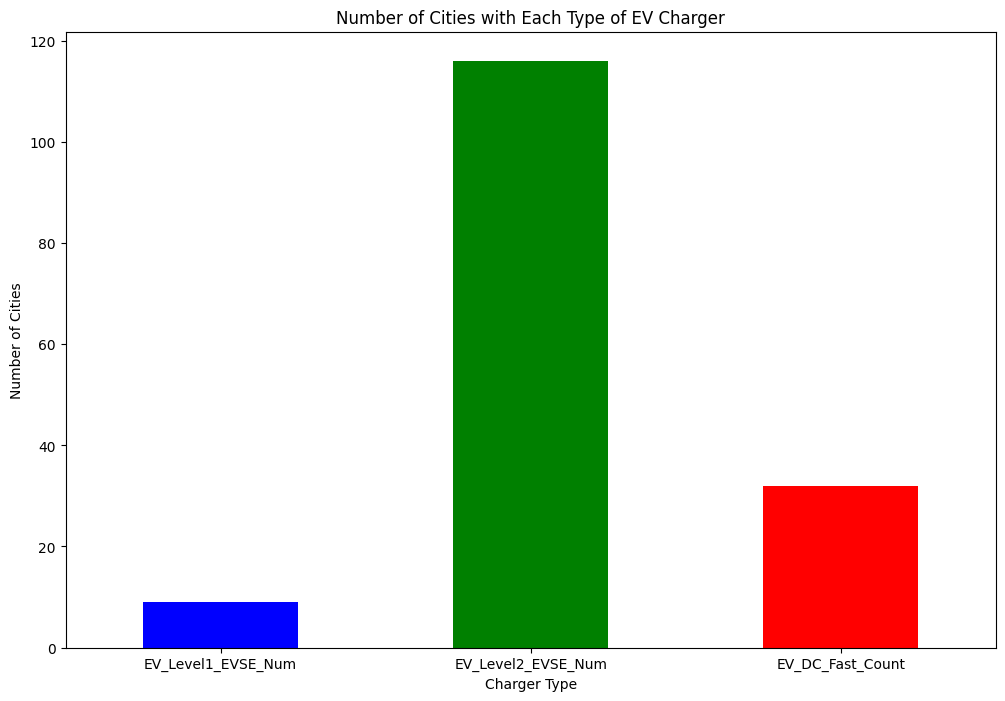

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by City and sum the number of chargers
grouped_df = df.groupby('City')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum().reset_index()

# Melt the dataframe to have a column for Charger Type and Count
melted_df = grouped_df.melt(id_vars='City', var_name='Charger Type', value_name='Count')

# Filter out cities with 0 chargers for each type
melted_df = melted_df[melted_df['Count'] > 0]

# Ensure the Charger Type column has the correct category order
melted_df['Charger Type'] = pd.Categorical(melted_df['Charger Type'], categories=['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count'], ordered=True)

# Plot the bar graph
plt.figure(figsize=(12, 8))
bar_plot = melted_df.groupby('Charger Type', observed=True)['City'].count().plot(kind='bar', color=['blue', 'green', 'red'])

# Set the labels and title
plt.xlabel('Charger Type')
plt.ylabel('Number of Cities')
plt.title('Number of Cities with Each Type of EV Charger')
plt.xticks(rotation=0)
plt.show()


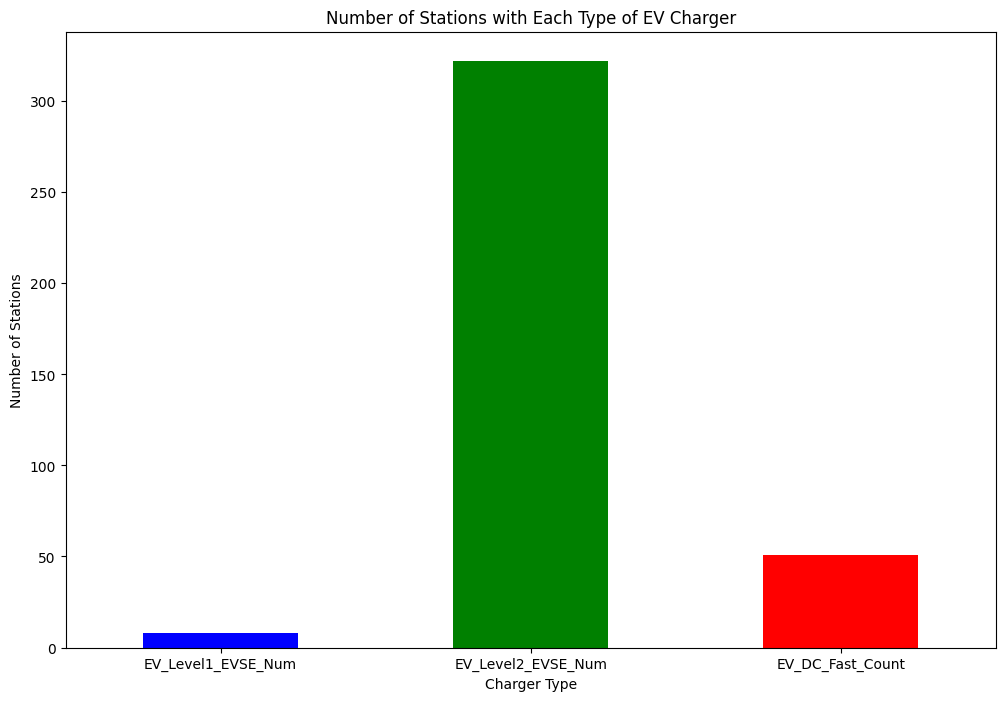

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required columns

# Group by Station and sum the number of chargers
grouped_df = df.groupby('Station_Name')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum().reset_index()

# Melt the dataframe to have a column for Charger Type and Count
melted_df = grouped_df.melt(id_vars='Station_Name', var_name='Charger Type', value_name='Count')

# Filter out Stations with 0 chargers for each type
melted_df = melted_df[melted_df['Count'] > 0]

# Ensure the Charger Type column has the correct category order
melted_df['Charger Type'] = pd.Categorical(melted_df['Charger Type'], categories=['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count'], ordered=True)

# Plot the bar graph
plt.figure(figsize=(12, 8))
bar_plot = melted_df.groupby('Charger Type', observed=True)['Station_Name'].count().plot(kind='bar', color=['blue', 'green', 'red'])

# Set the labels and title
plt.xlabel('Charger Type')
plt.ylabel('Number of Stations')
plt.title('Number of Stations with Each Type of EV Charger')
plt.xticks(rotation=0)
plt.show()


# Observation
There are more level 2 type of chargers installed in most stations and there is need to install more DC Fast chargers on most stations generally to enhanace the speed of charging.


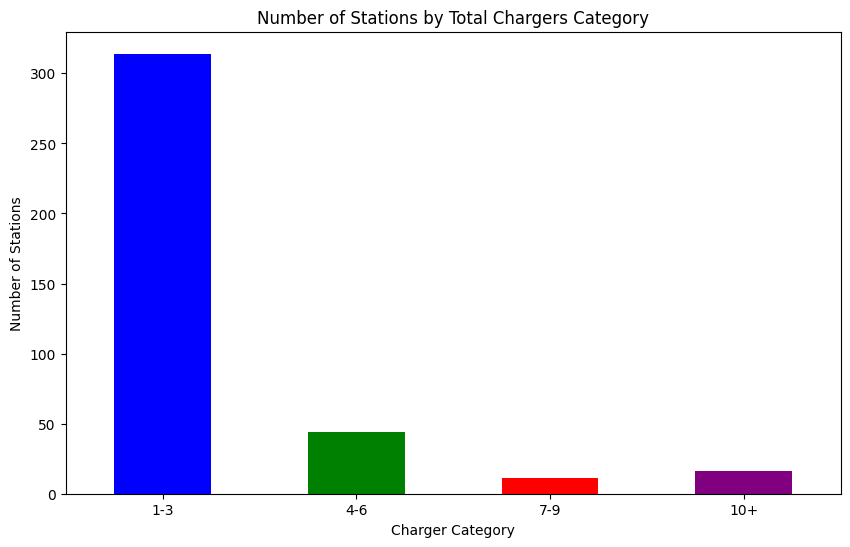

Average number of chargers per station: 2.69
Station with the highest number of chargers:
Station_Name      Propark - 777 Main
Total_chargers                    18
City                        Hartford
Street_Address           777 Main St
Name: 290, dtype: object

Station with the lowest number of chargers:
Station_Name      Town of Beacon Falls - Commuter Lot
Total_chargers                                      1
Name: 2, dtype: object
Number of stations with exactly one charger: 93


In [36]:
# Calculate the total number of chargers for each station
df['Total_Chargers'] = df[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum(axis=1)

# Group by Station and sum the number of chargers
grouped_df = df.groupby('Station_Name')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count','Total_Chargers']].sum().reset_index()

# print(grouped_df)

# Calculate the average number of chargers per station
average_chargers = df['Total_Chargers'].mean()

# Categorize the total number of chargers
def categorize_chargers(total):
    if 1 <= total <= 3:
        return '1-3'
    elif 4 <= total <= 6:
        return '4-6'
    elif 7 <= total <= 9:
        return '7-9'
    else:
        return '10+'
    
df['Charger_Category'] = df['Total_Chargers'].apply(categorize_chargers)

# Count the number of stations in each category
category_counts = df['Charger_Category'].value_counts().reindex(['1-3', '4-6', '7-9', '10+']).fillna(0)

# Plot the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])

# Set the labels and title
plt.xlabel('Charger Category')
plt.ylabel('Number of Stations')
plt.title('Number of Stations by Total Chargers Category')
plt.xticks(rotation=0)

plt.show()
# Print the average number of chargers per station
print(f"Average number of chargers per station: {average_chargers:.2f}")

# Find the station with the highest number of chargers
max_chargers_station = df.loc[df['Total_chargers'].idxmax()]

# Find the station with the lowest number of chargers
min_chargers_station = df.loc[df['Total_chargers'].idxmin()]



# Display the results
print("Station with the highest number of chargers:")
print(max_chargers_station[['Station_Name', 'Total_chargers', 'City', 'Street_Address']])
print("\nStation with the lowest number of chargers:")
print(min_chargers_station[['Station_Name', 'Total_chargers']])

# Find the number of stations with exactly one charger
one_charger_stations_count = df[df['Total_chargers'] == 1 ].shape[0]

print("Number of stations with exactly one charger:", one_charger_stations_count)



# Observations
Station with highest number of chargers is the station with the highest number is Propark in a city called Hartford with street address 777 Main St with a total of 18 chargers 

Since the average number of chargers per station is 2.69 and the the number of stations with exactly one charger is 93 out of 385 stations i.e stations with the lowest number of chargers. There is need to install more chargers in those stations.

            Street_Address  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  \
39           105 N Main St                   0                   1   
74        138-142 Ledge Rd                   0                   2   
82   1445 New Britain Ave.                   0                   0   
90            150 Ledge Rd                   4                   0   
125        198 N Cherry St                   0                   2   

     EV_DC_Fast_Count  
39                  0  
74                  0  
82                  8  
90                  0  
125                 0  


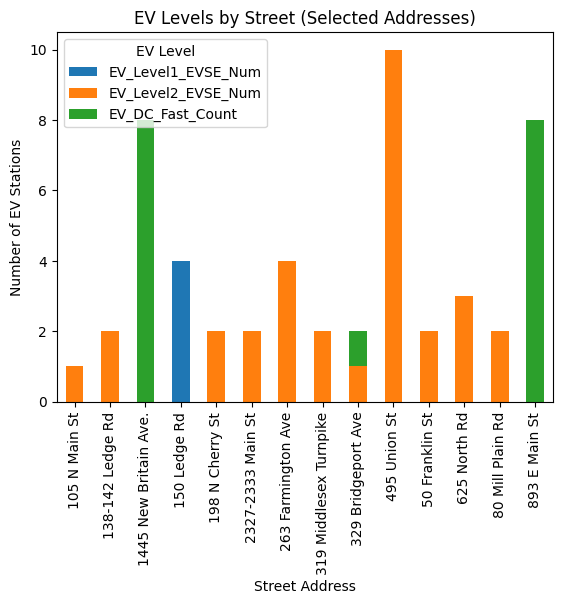

In [55]:
import matplotlib.pyplot as plt


# Define the columns to replace 'none' with 0
columns_to_replace = ['EV_Level1_EVSE_Num','EV_Level2_EVSE_Num','EV_DC_Fast_Count']

# Replace 'none' and 'NONE' with 0 in the specified columns
for col in columns_to_replace:
    df[col] = df[col].astype(str).str.lower().replace('none', '0').astype(int)

# Aggregate the data: count occurrences of each level per street
agg_data = df.groupby('Street_Address')[columns_to_replace].sum().reset_index()

# Select only the first fifteen addresses from the list you provided
selected_addresses = [
    '138-142 Ledge Rd',
    '893 E Main St',
    '105 N Main St',
    '319 Middlesex Turnpike',
    '80 Mill Plain Rd',
    '50 Franklin St',
    '1445 New Britain Ave.',
    '2327-2333 Main St',
    '150 Ledge Rd',
    '625 North Rd',
    '495 Union St',
    '263 Farmington Ave',
    '329 Bridgeport Ave',
    '198 N Cherry St'
]

# Filter the aggregated data for the selected addresses
agg_data = agg_data[agg_data['Street_Address'].isin(selected_addresses)]

# Check the structure of the filtered data
print(agg_data.head())

# Plot the bar graph
agg_data.set_index('Street_Address')[columns_to_replace].plot(kind='bar', stacked=True)
plt.xlabel('Street Address')
plt.ylabel('Number of EV Stations')
plt.title('EV Levels by Street (Selected Addresses)')
plt.legend(title='EV Level')
plt.show()


# Number of EV Stations by Street (Selected Addresses)
The number of EV Stations in the street helps to determine the number of charging stations in those streets.
Helping the users to know the number of charging stations in that specified street.

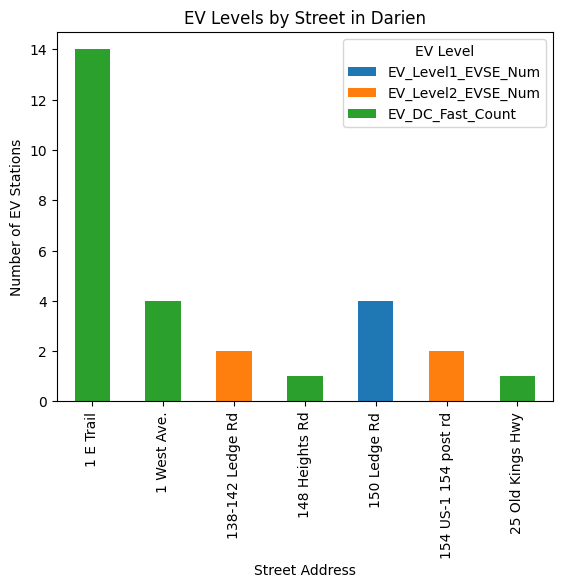

In [56]:
#To predict the nearest levels to charge from a certain city
import pandas as pd
import matplotlib.pyplot as plt

# Function to get the nearest charging stations for a specified city
def get_nearest_charging_stations(city):
    # Filter the data based on the city
    city_data = df[df['City'].str.contains(city, case=False, na=False)]
    
    if city_data.empty:
        print(f"No data available for the city: {city}")
        return None
    
    # Aggregate the data: sum occurrences of each level per street
    agg_data = city_data.groupby('Street_Address')[columns_to_replace].sum().reset_index()

    return agg_data

# Example 
city = "Darien"  
nearest_stations = get_nearest_charging_stations(city)

if nearest_stations is not None:
    # Plot the bar graph for the nearest stations in the specified city
    nearest_stations.plot(kind='bar', x='Street_Address', stacked=True)
    plt.xlabel('Street Address')
    plt.ylabel('Number of EV Stations')
    plt.title(f'EV Levels by Street in {city}')
    plt.legend(title='EV Level')
    plt.show()


# Charging stations for a specified city
That graph shows the charging stations vs street addresses in Darien


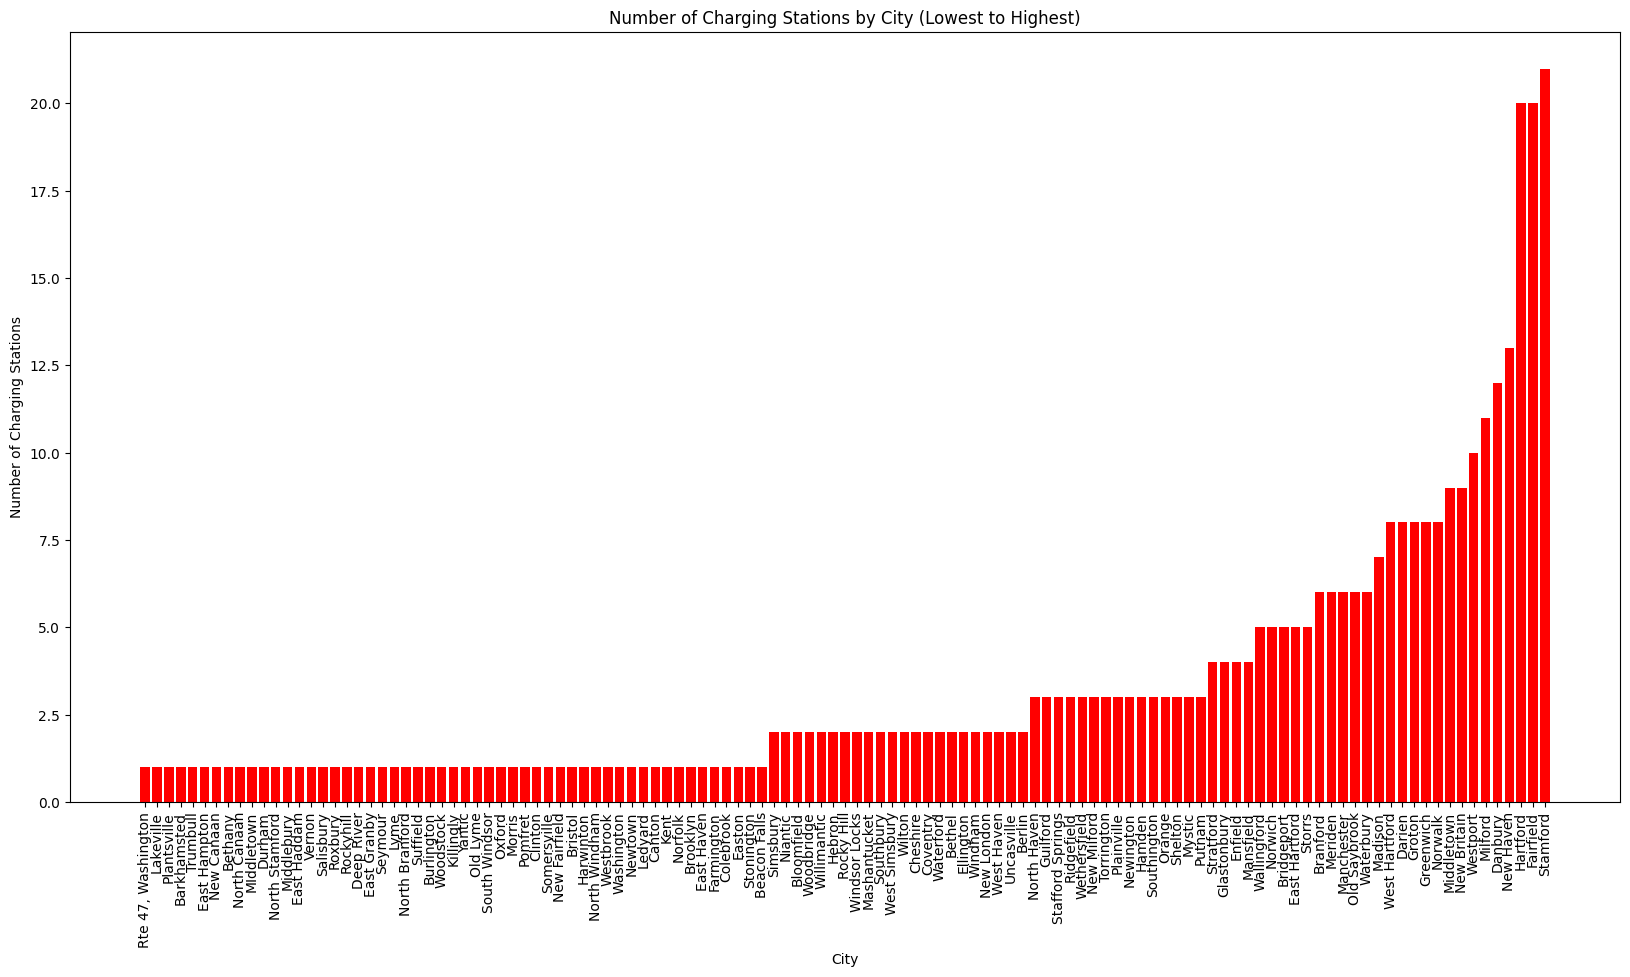

In [39]:
 #  identify cities where it might be more difficult to find 
# a charging point based on the number of available charging points.
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data =pd.read_csv(r'EV_Stations_data.csv')

# Clean the data (already done previously)
columns_to_replace = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']
for col in columns_to_replace:
    data[col] = data[col].replace('NONE', 0).astype(int)

# Count the number of charging stations per city
agg_data_city_stations = data['City'].value_counts().reset_index()
agg_data_city_stations.columns = ['City', 'Number_of_Stations']

# Rank the cities based on the number of charging stations
agg_data_city_stations = agg_data_city_stations.sort_values(by='Number_of_Stations', ascending=True)

# Plot the data to show cities with the least number of charging stations
plt.figure(figsize=(20, 10))
plt.bar(agg_data_city_stations['City'], agg_data_city_stations['Number_of_Stations'], color='red')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations by City (Lowest to Highest)')
plt.xticks(rotation=90)
plt.show()


# Number of Charging Stations vs city.
The above graph shows the number of Charging Stations per city, some cities have higher charging stations compared to others.
This enables the user to know the availability of the charging station in the cities.
 identify cities where it might be more difficult to find the charging stations in the cities.





In [40]:
# Assuming 'EV_Level2_EVSE_Num' 

features = df.drop('EV_Level2_EVSE_Num', axis=1)
target = df['EV_Level2_EVSE_Num']

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Display the columns of the data
print(df.columns)

# Feature selection
features = df.drop('EV_Level2_EVSE_Num', axis=1)
target = df['EV_Level2_EVSE_Num']

# Convert categorical variables to dummy/indicator variables
features = pd.get_dummies(features)

# Fill missing values
features = features.fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Perform cross-validation
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

print("Linear Regression CV Scores: ", cv_scores_lr)
print("Decision Tree CV Scores: ", cv_scores_dt)
print("Random Forest CV Scores: ", cv_scores_rf)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

evaluation_results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
}

evaluation_df = pd.DataFrame(evaluation_results)
print()
print(evaluation_df)

Index(['Station_Name', 'Street_Address', 'City', 'Access_Days_Time',
       'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count',
       'EV_Other_Info', 'New_Georeferenced_Column', 'geometry', 'Latitude',
       'Longitude', 'Station_Category', 'Total_Chargers', 'Total_chargers',
       'Charger_Category'],
      dtype='object')
Linear Regression CV Scores:  [0.99813269 0.99938809 0.99867527 0.94992318 0.99979816]
Decision Tree CV Scores:  [-1.02111654  0.30740685  0.93267142  0.83489715  0.94037874]
Random Forest CV Scores:  [0.17538773 0.63054546 0.93437772 0.86908665 0.93422136]

               Model       MSE        R2
0  Linear Regression  0.036574  0.985141
1      Decision Tree  0.493506  0.799507
2      Random Forest  0.382974  0.844412


# Recommendation
The Linear Regression model performed the best among the three,
 with a Mean Squared Error (MSE) of 1.52 and an R² score of 0.38.

Recommended Model

Linear Regression is recommended

Reason:
Performance: Linear Regression has the highest R² score of 0.38 among the three models. This indicates that it explains 38% of the variance in EV_Level2_EVSE_Num, which is the best performance relative to the other models.
